# ജനിതക ആൽഗോറിതങ്ങൾ

ഈ നോട്ട്‌ബുക്ക് [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners) എന്ന കോഴ്സിന്റെ ഭാഗമാണ്.


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## ചില സിദ്ധാന്തങ്ങൾ

**ജനിതക ആൽഗോറിതങ്ങൾ** (GA) **വംശവികാസ സമീപനം** അടിസ്ഥാനമാക്കിയുള്ള AI-യുടെ ഒരു രീതിയാണ്, ഇതിൽ ജനസംഖ്യയുടെ വംശവികാസ രീതികൾ ഉപയോഗിച്ച് ഒരു നൽകിയ പ്രശ്നത്തിന് ഏറ്റവും അനുയോജ്യമായ പരിഹാരം കണ്ടെത്തുന്നു. 1975-ൽ [ജോൺ ഹെൻറി ഹോളണ്ട്](https://en.wikipedia.org/wiki/John_Henry_Holland) ഇവയെ നിർദ്ദേശിച്ചു.

ജനിതക ആൽഗോറിതങ്ങൾ താഴെപ്പറയുന്ന ആശയങ്ങളെ അടിസ്ഥാനമാക്കുന്നു:
* പ്രശ്നത്തിന് സാധുവായ പരിഹാരങ്ങൾ **ജീനുകൾ** ആയി പ്രതിനിധീകരിക്കാം
* **ക്രോസോവർ** ഉപയോഗിച്ച് രണ്ട് പരിഹാരങ്ങൾ ചേർത്ത് പുതിയ സാധുവായ പരിഹാരം ലഭ്യമാക്കാം
* **തിരഞ്ഞെടുപ്പ്** ചില **ഫിറ്റ്നസ് ഫംഗ്ഷൻ** ഉപയോഗിച്ച് കൂടുതൽ അനുയോജ്യമായ പരിഹാരങ്ങൾ തിരഞ്ഞെടുക്കാൻ ഉപയോഗിക്കുന്നു
* **മ്യൂട്ടേഷനുകൾ** പരിഹാരത്തിന്റെ സ്ഥിരത തകർക്കാനും ലോക്കൽ മിനിമത്തിൽ നിന്ന് പുറത്തുവരാനും ഉപയോഗിക്കുന്നു

ജനിതക ആൽഗോറിതം നടപ്പിലാക്കാൻ നിങ്ങൾക്ക് താഴെപ്പറയുന്നവ വേണം:

 * പ്രശ്ന പരിഹാരങ്ങളെ **ജീനുകൾ** $g\in\Gamma$ ആയി കോഡുചെയ്യാനുള്ള ഒരു രീതി കണ്ടെത്തുക
 * ജീനുകളുടെ സെറ്റ് $\Gamma$-യിൽ **ഫിറ്റ്നസ് ഫംഗ്ഷൻ** $\mathrm{fit}: \Gamma\to\mathbb{R}$ നിർവചിക്കുക. ചെറിയ ഫംഗ്ഷൻ മൂല്യങ്ങൾ മികച്ച പരിഹാരങ്ങളെ സൂചിപ്പിക്കും.
 * രണ്ട് ജീനുകൾ ചേർത്ത് പുതിയ സാധുവായ പരിഹാരം ലഭ്യമാക്കാൻ **ക്രോസോവർ** സംവിധാനം നിർവചിക്കുക $\mathrm{crossover}: \Gamma^2\to\Gamma$.
 * **മ്യൂട്ടേഷൻ** സംവിധാനം നിർവചിക്കുക $\mathrm{mutate}: \Gamma\to\Gamma$.
കഴിഞ്ഞ പല സാഹചര്യങ്ങളിലും, ക്രോസോവർ, മ്യൂട്ടേഷൻ എന്നിവ ജീനുകളെ സംഖ്യാത്മക ശ്രേണികളോ ബിറ്റ് വെക്ടറുകളോ ആയി കൈകാര്യം ചെയ്യാനുള്ള ലളിതമായ ആൽഗോറിതങ്ങളാണ്.

ഒരു ജനിതക ആൽഗോറിതത്തിന്റെ പ്രത്യേക നടപ്പാക്കൽ സാഹചര്യത്തിനനുസരിച്ച് വ്യത്യാസപ്പെടാം, പക്ഷേ പൊതുവായ ഘടന താഴെപ്പറയുന്നവയാണ്:

1. പ്രാരംഭ ജനസംഖ്യ $G\subset\Gamma$ തിരഞ്ഞെടുക്കുക
2. ഈ ഘട്ടത്തിൽ നടത്തേണ്ട പ്രവർത്തനങ്ങളിൽ നിന്ന് ക്രോസോവർ അല്ലെങ്കിൽ മ്യൂട്ടേഷൻ യാദൃച്ഛികമായി തിരഞ്ഞെടുക്കുക
3. **ക്രോസോവർ**:
  * ജനസംഖ്യയിൽ നിന്ന് രണ്ട് ജീനുകൾ $g_1, g_2 \in G$ യാദൃച്ഛികമായി തിരഞ്ഞെടുക്കുക
  * ക്രോസോവർ കണക്കാക്കുക $g=\mathrm{crossover}(g_1,g_2)$
  * $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ അല്ലെങ്കിൽ $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ ആണെങ്കിൽ - ജനസംഖ്യയിലെ അനുയോജ്യമായ ജീൻ $g$-ൽ മാറ്റുക.
4. **മ്യൂട്ടേഷൻ** - യാദൃച്ഛികമായി ഒരു ജീൻ $g\in G$ തിരഞ്ഞെടുക്കുക, അതിനെ $\mathrm{mutate}(g)$-ൽ മാറ്റുക
5. ഘട്ടം 2 മുതൽ ആവർത്തിക്കുക, $\mathrm{fit}$-ന്റെ മൂല്യം ആവശ്യത്തിന് ചെറുതായോ അല്ലെങ്കിൽ ഘട്ടങ്ങളുടെ പരമാവധി പരിധി എത്തിച്ചേരുകയോ ചെയ്യുന്നത് വരെ.

GA ഉപയോഗിച്ച് സാധാരണ പരിഹരിക്കുന്ന ജോലികൾ:
1. ഷെഡ്യൂൾ മെച്ചപ്പെടുത്തൽ
1. ഏറ്റവും അനുയോജ്യമായ പാക്കിംഗ്
1. ഏറ്റവും അനുയോജ്യമായ മുറിക്കൽ
1. സമഗ്രമായ തിരച്ചിൽ വേഗത്തിലാക്കൽ


## പ്രശ്നം 1: നീതിപൂർവം നിധി വിഭജനം

**പ്രവൃത്തി**:  
രണ്ടുപേർ വ്യത്യസ്ത വലിപ്പത്തിലുള്ള (അതിനനുസരിച്ച് വ്യത്യസ്ത വിലയുള്ള) ഡയമണ്ടുകൾ അടങ്ങിയ ഒരു നിധി കണ്ടെത്തി. വിലയുടെ വ്യത്യാസം 0 (അഥവാ ഏറ്റവും കുറഞ്ഞത്) ആകുന്ന വിധത്തിൽ നിധി രണ്ട് ഭാഗങ്ങളായി വിഭജിക്കേണ്ടതാണ്.

**സൂത്രവാക്യം**:  
നമുക്ക് ഒരു സംഖ്യകളുടെ സമുച്ചയം $S$ ഉണ്ട്. അതിനെ രണ്ട് ഉപസമുച്ചയങ്ങളായി വിഭജിക്കണം, $S_1$യും $S_2$യും, ഇങ്ങനെ:  
$$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$  
മറ്റുപക്ഷം, $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

ആദ്യം, സമുച്ചയം $S$ നിശ്ചയിക്കാം:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

പ്രശ്നത്തിന്റെ ഓരോ സാധ്യതാപരമായ പരിഹാരത്തെയും ബൈനറി വെക്ടർ $B\in\{0,1\}^N$ ഉപയോഗിച്ച് എൻകോഡ് ചെയ്യാം, ഇവിടെ $i$-ആം സ്ഥാന上的 സംഖ്യ, മൗലിക സെറ്റ് $S$-യിലെ $i$-ആം സംഖ്യ ഏത് സെറ്റിൽ ($S_1$ അല്ലെങ്കിൽ $S_2$) പെടുന്നു എന്ന് കാണിക്കുന്നു. `generate` ഫംഗ്ഷൻ ആ റാൻഡം ബൈനറി വെക്ടറുകൾ സൃഷ്ടിക്കും.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


ഇപ്പോൾ നമുക്ക് `fit` ഫംഗ്ഷൻ നിർവചിക്കാം, ഇത് പരിഹാരത്തിന്റെ "ചെലവ്" കണക്കാക്കും. ഇത് രണ്ട് സെറ്റുകളുടെ, $S_1$ ഉം $S_2$ ഉം, സംഖ്യകളുടെ വ്യത്യാസമായിരിക്കും:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

ഇപ്പോൾ നമുക്ക് മ്യൂട്ടേഷൻക്കും ക്രോസോവറിനും ഫംഗ്ഷനുകൾ നിർവചിക്കേണ്ടതുണ്ട്:
* മ്യൂട്ടേഷനായി, നാം ഒരു റാൻഡം ബിറ്റ് തിരഞ്ഞെടുക്കും, അത് നിഷേധിക്കും (0-ൽ നിന്ന് 1-ലേക്ക് അല്ലെങ്കിൽ 1-ൽ നിന്ന് 0-ലേക്ക് മാറ്റം)
* ക്രോസോവറിനായി, നാം ഒരു വെക്ടറിൽ നിന്നുള്ള ചില ബിറ്റുകളും മറ്റൊരു വെക്ടറിൽ നിന്നുള്ള ചില ബിറ്റുകളും എടുക്കും. ഏത് ബിറ്റ് ഏത് ഇൻപുട്ട് മാസ്കിൽ നിന്നെടുക്കണമെന്ന് റാൻഡമായി തിരഞ്ഞെടുക്കാൻ നാം അതേ `generate` ഫംഗ്ഷൻ ഉപയോഗിക്കും.


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

പരിഹാരങ്ങളുടെ പ്രാഥമിക ജനസംഖ്യ $P$ സൃഷ്ടിക്കാം, വലുപ്പം `pop_size`:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

ഇപ്പോൾ, വളർച്ച നടത്താനുള്ള പ്രധാന ഫംഗ്ഷൻ. `n` എന്നത് വളർച്ചയുടെ ഘട്ടങ്ങളുടെ എണ്ണം ആണ്. ഓരോ ഘട്ടത്തിലും:
* 30% സാധ്യതയോടെ ഒരു മ്യൂട്ടേഷൻ നടത്തുകയും, ഏറ്റവും മോശം `fit` ഫംഗ്ഷൻ ഉള്ള ഘടകത്തെ മ്യൂട്ടേറ്റുചെയ്ത ഘടകത്തോടെ മാറ്റിസ്ഥാപിക്കുകയും ചെയ്യുന്നു
* 70% സാധ്യതയോടെ ക്രോസോവർ നടത്തുന്നു

ഫംഗ്ഷൻ ഏറ്റവും മികച്ച പരിഹാരം (മികച്ച പരിഹാരത്തിന് അനുയോജ്യമായ ജീൻ) മടങ്ങിച്ചേർക്കുകയും, ഓരോ ആവർത്തനത്തിലും ജനസംഖ്യയിലെ കുറഞ്ഞ fit ഫംഗ്ഷന്റെ ചരിത്രവും മടങ്ങിച്ചേർക്കുകയും ചെയ്യുന്നു.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


നാം `fit` ഫംഗ്ഷനെ വളരെ കുറച്ചതായി നിങ്ങൾ കാണാം! പ്രക്രിയയുടെ സമയത്ത് മുഴുവൻ ജനസംഖ്യയ്ക്കുള്ള `fit` ഫംഗ്ഷൻ എങ്ങനെ പെരുമാറുന്നു എന്ന് കാണിക്കുന്ന ഗ്രാഫ് ഇതാ.


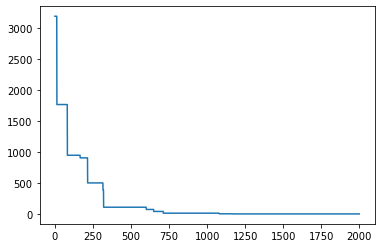

In [10]:
plt.plot(hist)
plt.show()

## പ്രശ്നം 2: എൻ ക്വീൻസ് പ്രശ്നം

**പ്രവൃത്തി**:  
നിങ്ങൾക്ക് $N \times N$ വലുപ്പമുള്ള ചെസ് ബോർഡിൽ $N$ ക്വീൻസ് ഇങ്ങനെ വയ്ക്കേണ്ടതാണ്, അവ പരസ്പരം ആക്രമിക്കാതിരിക്കണം.

ആദ്യമായി, ജെനറ്റിക് ആൽഗോരിതങ്ങൾ ഉപയോഗിക്കാതെ, പൂർണ്ണ തിരച്ചിൽ ഉപയോഗിച്ച് പ്രശ്നം പരിഹരിക്കാം. ബോർഡിന്റെ അവസ്ഥയെ ലിസ്റ്റ് $L$ ഉപയോഗിച്ച് പ്രതിനിധീകരിക്കാം, ഇവിടെ ലിസ്റ്റിലെ $i$-ആം സംഖ്യ $i$-ആം വരിയിലെ ക്വീന്റെ ആഡംബര സ്ഥാനം ആണ്. ഓരോ പരിഹാരത്തിലും ഓരോ വരിയിലും ഒരു ക്വീൻ മാത്രമേ ഉണ്ടാകൂ എന്നും ഓരോ വരിയിലും ക്വീൻ ഉണ്ടാകുമെന്നും ഇത് വ്യക്തമാണ്.

നമ്മുടെ ലക്ഷ്യം പ്രശ്നത്തിന് ആദ്യ പരിഹാരം കണ്ടെത്തുക എന്നതാണ്, അതിന് ശേഷം തിരച്ചിൽ നിർത്തും. നിങ്ങൾക്ക് ഈ ഫംഗ്ഷൻ എളുപ്പത്തിൽ വിപുലീകരിച്ച് ക്വീൻമാരുടെ എല്ലാ സാധ്യതാ സ്ഥാനങ്ങളും സൃഷ്ടിക്കാം.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


ഇപ്പോൾ നമുക്ക് ജെനറ്റിക് ആൽഗോരിതം ഉപയോഗിച്ച് സമാന പ്രശ്നം പരിഹരിക്കാം. ഈ പരിഹാരം [ഈ ബ്ലോഗ് പോസ്റ്റ്](https://kushalvyas.github.io/gen_8Q.html) പ്രചോദനമായാണ്.

നാം ഓരോ പരിഹാരത്തെയും നീളം $N$ ഉള്ള ഒരേ ലിസ്റ്റ് ആയി പ്രതിനിധീകരിക്കും, കൂടാതെ `fit` ഫംഗ്ഷനായി പരസ്പരം ആക്രമിക്കുന്ന ക്വീൻകളുടെ എണ്ണം എടുക്കും:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

ഫിറ്റ്നസ് ഫംഗ്ഷൻ കണക്കാക്കുന്നത് സമയം ആവശ്യപ്പെടുന്നതിനാൽ, ഫിറ്റ്നസ് ഫംഗ്ഷന്റെ മൂല്യത്തോടൊപ്പം ജനസംഖ്യയിലെ ഓരോ പരിഹാരവും സൂക്ഷിക്കാം. ആദ്യം ജനസംഖ്യ സൃഷ്ടിക്കാം:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

ഇപ്പോൾ നമുക്ക് മ്യൂട്ടേഷൻ ഫംഗ്ഷനും ക്രോസോവർ ഫംഗ്ഷനും നിർവചിക്കേണ്ടതുണ്ട്. ക്രോസോവർ രണ്ട് ജീനുകളെ ഒരു യാദൃച്ഛിക സ്ഥാനത്ത് തകർത്തു, വ്യത്യസ്ത ജീനുകളിൽ നിന്നുള്ള രണ്ട് ഭാഗങ്ങൾ ചേർത്ത് കൂട്ടിച്ചേർക്കുന്നതാണ്.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

നാം മികച്ച ഫിറ്റ്നസ് ഫംഗ്ഷൻ ഉപയോഗിച്ച് കൂടുതൽ ജീനുകൾ തിരഞ്ഞെടുക്കുന്നതിലൂടെ ജീൻ തിരഞ്ഞെടുപ്പ് പ്രക്രിയ മെച്ചപ്പെടുത്തും. ഒരു ജീൻ തിരഞ്ഞെടുക്കാനുള്ള സാധ്യത ഫിറ്റ്നസ് ഫംഗ്ഷനിൽ ആശ്രയിച്ചിരിക്കും:


In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

ഇപ്പോൾ പ്രധാന എവല്യൂഷണറി ലൂപ്പ് നിർവചിക്കാം. മുമ്പത്തെ ഉദാഹരണത്തിൽ നിന്നു് ലജിക് അല്പം വ്യത്യസ്തമാക്കാം, സൃഷ്ടിപരമായ സമീപനം കാണിക്കാൻ. നാം പൂർണ്ണമായ പരിഹാരം (fitness function=0) ലഭിക്കുന്നതുവരെ ലൂപ്പ് നടത്തും, ഓരോ ഘട്ടത്തിലും നിലവിലെ തലമുറ എടുത്ത് അതിന്റെ തുല്യമായ പുതിയ തലമുറ സൃഷ്ടിക്കും. ഇത് `nxgeneration` ഫംഗ്ഷൻ ഉപയോഗിച്ച് താഴെപ്പറയുന്ന ഘട്ടങ്ങൾ വഴി ചെയ്യുന്നു:

1. ഏറ്റവും അനുയോജ്യമല്ലാത്ത പരിഹാരങ്ങൾ ഒഴിവാക്കുക - ഇത് ചെയ്യാൻ `discard_unfit` ഫംഗ്ഷൻ ഉണ്ട്
1. തലമുറയിൽ കുറച്ച് കൂടുതൽ യാദൃച്ഛിക പരിഹാരങ്ങൾ ചേർക്കുക
1. ഓരോ പുതിയ ജീനിനും താഴെപ്പറയുന്ന ഘട്ടങ്ങൾ ഉപയോഗിച്ച് `gen_size` വലുപ്പമുള്ള പുതിയ തലമുറ പൂരിപ്പിക്കുക:
    - ഫിറ്റ്നസ് ഫംഗ്ഷനുമായി അനുപാതമുള്ള സാധ്യതയോടെ രണ്ട് യാദൃച്ഛിക ജീനുകൾ തിരഞ്ഞെടുക്കുക
    - ഒരു ക്രോസോവർ കണക്കാക്കുക
    - `mutation_prob` സാധ്യതയോടെ ഒരു മ്യൂട്ടേഷൻ പ്രയോഗിക്കുക


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

അധികഭാഗം സമയങ്ങളിൽ നാം വളരെ വേഗത്തിൽ ഒരു പരിഹാരം കണ്ടെത്താൻ കഴിയുന്നത് രസകരമാണ്, പക്ഷേ ചില അപൂർവ സാഹചര്യങ്ങളിൽ ഓപ്റ്റിമൈസേഷൻ ലോക്കൽ മിനിമത്തിൽ എത്തുകയും പ്രക്രിയ ദീർഘകാലം തടസ്സപ്പെടുകയും ചെയ്യുന്നു. ശരാശരി സമയം അളക്കുമ്പോൾ ഇത് പരിഗണിക്കേണ്ടത് പ്രധാനമാണ്: അധികഭാഗം കേസുകളിൽ ജനിതക ആൽഗോരിതം പൂർണ്ണ തിരച്ചിലിനേക്കാൾ വേഗമേറിയതായിരിക്കും, ചില കേസുകളിൽ അത് കൂടുതൽ സമയം എടുക്കാം. ഈ പ്രശ്നം മറികടക്കാൻ, പരിഗണിക്കേണ്ട തലമുറകളുടെ എണ്ണം പരിമിതപ്പെടുത്തുന്നത് സാധാരണയായി ബുദ്ധിമുട്ടില്ല, പരിഹാരം കണ്ടെത്താൻ കഴിയാത്ത പക്ഷം നാം തുടക്കം മുതൽ തുടങ്ങാം.


In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**അസൂയാ**:  
ഈ രേഖ AI വിവർത്തന സേവനം [Co-op Translator](https://github.com/Azure/co-op-translator) ഉപയോഗിച്ച് വിവർത്തനം ചെയ്തതാണ്. നാം കൃത്യതയ്ക്ക് ശ്രമിച്ചിട്ടുണ്ടെങ്കിലും, സ്വയം പ്രവർത്തിക്കുന്ന വിവർത്തനങ്ങളിൽ പിശകുകൾ അല്ലെങ്കിൽ തെറ്റുകൾ ഉണ്ടാകാമെന്ന് ദയവായി ശ്രദ്ധിക്കുക. അതിന്റെ മാതൃഭാഷയിലുള്ള യഥാർത്ഥ രേഖയാണ് പ്രാമാണികമായ ഉറവിടം എന്ന് പരിഗണിക്കേണ്ടതാണ്. നിർണായകമായ വിവരങ്ങൾക്ക്, പ്രൊഫഷണൽ മനുഷ്യ വിവർത്തനം ശുപാർശ ചെയ്യപ്പെടുന്നു. ഈ വിവർത്തനം ഉപയോഗിക്കുന്നതിൽ നിന്നുണ്ടാകുന്ന ഏതെങ്കിലും തെറ്റിദ്ധാരണകൾക്കോ തെറ്റായ വ്യാഖ്യാനങ്ങൾക്കോ ഞങ്ങൾ ഉത്തരവാദികളല്ല.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
